<a href="https://colab.research.google.com/github/Kunal726/LP5/blob/main/Binary_classification_using_Deep_Neural_Networks_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
#import required libraries
import numpy as np
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
#load dataset
(X_train, Y_train),(X_test, Y_test) = imdb.load_data(num_words = 1000)

In [67]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189,

In [68]:
X_test

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 2, 394, 354, 4, 123, 9, 2, 2, 2, 10, 10, 13, 92, 124, 89, 488, 2, 100, 28, 2, 14, 31, 23, 27, 2, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 2, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 2, 6, 176, 7, 2, 88, 12, 2, 23, 2, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 2, 2, 4, 2, 2, 109, 2, 21, 4, 22, 2, 8, 6, 2, 2, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 2, 5, 2, 2, 45, 55, 221, 15, 670, 2, 526, 14, 2, 4, 405, 5, 2, 7, 27, 85, 108, 131, 4, 2, 2, 2, 405, 9, 2, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 2, 2, 45, 407, 31, 7, 41, 2, 105, 21, 59, 299, 12, 38, 950, 5, 2, 15, 45, 629, 488, 2, 127, 6, 52, 292, 17, 4, 2, 185, 132, 2, 2, 2, 488, 2, 47, 6, 392, 173, 4, 2, 2, 270, 2, 4, 2, 7, 4, 65, 55, 73, 11, 346, 14, 20, 9, 6, 976, 2, 7, 2, 861, 2, 5, 2, 30, 2, 2, 56, 4, 841, 5, 990, 692, 8, 4, 2, 398, 229, 10,

In [69]:
Y_train

array([1, 0, 0, ..., 0, 1, 0])

In [70]:
Y_test

array([0, 1, 1, ..., 0, 0, 0])

In [78]:
#preprocessing the data
x_train = pad_sequences(X_train, maxlen=10000)
x_test = pad_sequences(X_test, maxlen=10000)

In [79]:
x_train

array([[  0,   0,   0, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [  0,   0,   0, ...,   4,   2,   2],
       [  0,   0,   0, ...,  12,   9,  23],
       [  0,   0,   0, ..., 204, 131,   9]], dtype=int32)

In [114]:
# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                640064    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 642,689
Trainable params: 642,689
Non-tr

In [115]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, Y_train, epochs=10, batch_size=32, validation_data=(x_test, Y_test))

Epoch 1/10
779/782 [============================>.] - ETA: 0s - loss: 0.6858 - accuracy: 0.5261

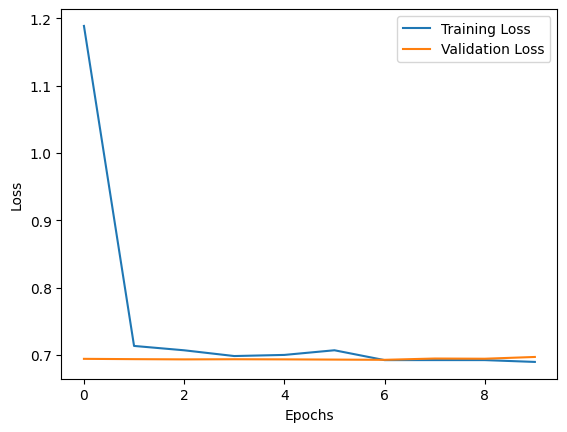

In [118]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

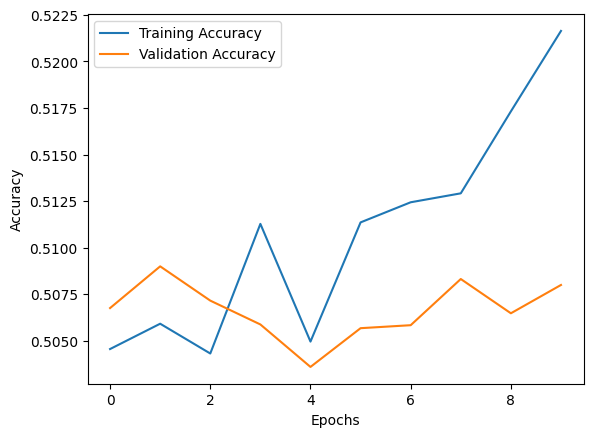

In [120]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [121]:
# Display a sample movie review
word_index = imdb.get_word_index()
index_to_word = {index: word for word, index in word_index.items()}
sample_review = " ".join([index_to_word.get(index, '?') for index in x_train[0]])
print("Sample Movie Review:")
print(sample_review)

Sample Movie Review:
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?

In [122]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.6971 - accuracy: 0.5080
Test Loss: 0.6971367001533508
Test Accuracy: 0.5080000162124634


In [123]:
# Test the model
prediction = model.predict(x_test)  # Make predictions on the review

782/782 [==============================] - 3s 4ms/step


In [124]:
# Convert the predicted value to a sentiment label
predicted_sentiment = "Positive" if prediction[0] >= 0.5 else "Negative"

In [125]:
# Convert the index-encoded review back to words
word_index = imdb.get_word_index()
index_to_word = {index: word for word, index in word_index.items()}
decoded_review = " ".join([index_to_word.get(index - 3, "?") for index in test_review])


In [126]:
# Print the predicted sentiment and the original review
print("Predicted Sentiment: ", predicted_sentiment)
print("Original Review: ", decoded_review)

Predicted Sentiment:  Negative
Original Review:  ? performance is way too ? for one thing in ? series of ? gives one the feeling that he ? well into his ? most of the time being ? back and slow moving this is just like the deep ? and ? ? then at times is nearly ? in his ? just ? at a fast ? through the whole movie he doesn't ? ? ? is ? ? ? is out of place about the only good thing about this is the setting on the whole the movie gives one the ? of a tv movie


In [127]:
Y_test

array([0, 1, 1, ..., 0, 0, 0])

In [128]:
np.ceil(prediction)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)